# Import libraries and datasets

In [170]:
import pandas as pd # to load and manipulate dataframes
import matplotlib.pyplot as plt # to make plots
import numpy as np 
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score


In [81]:
dfD = pd.read_csv("https://raw.githubusercontent.com/kaebry/DSF/main/Data/clean_data/daily_data.csv") #Daily data
dfW = pd.read_csv("https://raw.githubusercontent.com/kaebry/DSF/main/Data/clean_data/weekly_data.csv") #Weekly data
dfM = pd.read_csv("https://raw.githubusercontent.com/kaebry/DSF/main/Data/clean_data/monthly_data.csv") #Monthly data

In [82]:
df_list = [dfD, dfW, dfM] #A lsit with all the dataframes

In [83]:
    # Define a function to set datetime as index
def datetime_as_index(df):
        if 'Unnamed: 0' in df.columns:
            df.rename(columns={"Unnamed: 0": "datetime"}, inplace = True)
        df["datetime"] = pd.to_datetime(df["datetime"])
        df = df.set_index("datetime")
        #drop Nan values
        df.dropna(inplace=True)
        return df

In [84]:
df_list = [datetime_as_index(df) for df in df_list] #Set the datetime as index for the dataframes

In [87]:
dfD, dfW, dfM = df_list

# Visualisation of the traget variable

In [103]:
def graph(df, column, color, title):
    fig, ax = plt.subplots(figsize=(8,4))
    ax.plot(df[column], label=column, color=color)
    ax.grid(linestyle="--")
    ax.legend()
    ax.set_title(title)

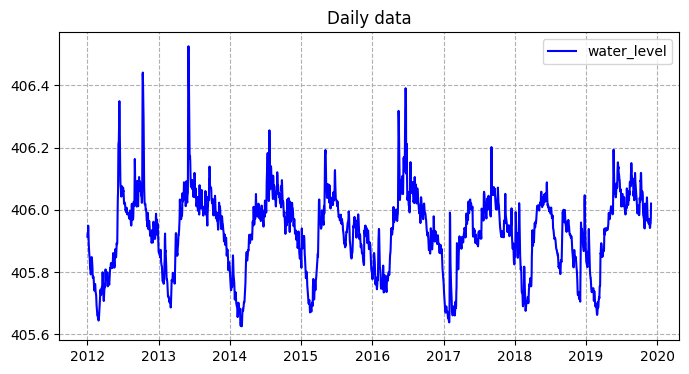

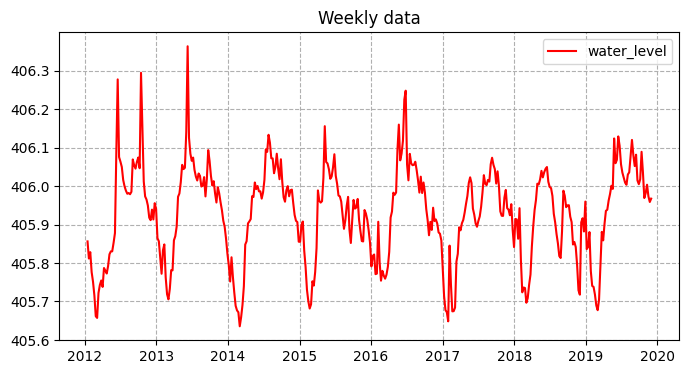

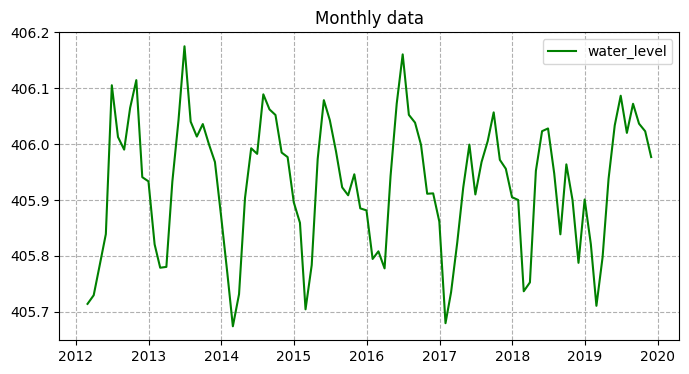

In [104]:
graph(dfD, 'water_level', 'blue', 'Daily data')
graph(dfW, 'water_level', 'red', 'Weekly data')
graph(dfM, 'water_level', 'green', 'Monthly data')

# Train/validation/test split

In [121]:
#Split train/test
split_date_test = '2019-01-01'
df_list_train_val = [df.loc[df.index <= split_date_test].copy() for df in df_list]
df_list_test = [df.loc[df.index > split_date_test].copy() for df in df_list]

In [122]:
dfD_train_val, dfW_train_val, dfM_train_val = df_list_train_val 
dfD_test, dfW_test, dfM_test = df_list_test

In [123]:
#Split train/validation
split_date_val = '2018-01-01'
df_list_train = [df.loc[df.index <= split_date_val].copy() for df in df_list_train_val]
df_list_val = [df.loc[df.index > split_date_val].copy() for df in df_list_train_val]

In [124]:
dfD_train, dfW_train, dfM_train = df_list_train
dfD_val, dfW_val, dfM_val = df_list_val

# Evaluation metrics

We define a function to calculate how well our different models do

In [177]:
def mean_errors_print(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    MAE = mae(actual, pred)
    MSE = np.square(np.subtract(actual,pred)).mean()
    MAPE = np.mean(np.abs((actual - pred) / actual)) * 100
    R2_score = r2_score(actual, pred)
    return print("MAE: {} \nMSE: {} \nMAPE: {} \nR2: {}".format(MAE, MSE, MAPE, R2_score))

# Mean method

In [149]:
df_list_mean = [df.copy()  for df in df_list_train_val]
df_list_mean_test = [df.copy()  for df in df_list_test]
for i in range(len(df_list_mean)):
    df_list_mean[i]["mean"] = df_list_mean[i]["water_level"].mean()
    df_list_mean_test[i]["prediction"] = df_list_mean[i]["water_level"].mean()
    


**Testing the results**

In [165]:
def plot_pred(df, true_col, pred_col, title):

        fig, ax = plt.subplots(figsize=(12,5))
        ax.grid()
        ax.plot(df[true_col], label = true_col)
        ax.plot(df[pred_col], label = pred_col)
        ax.set_title(title)
        ax.legend()

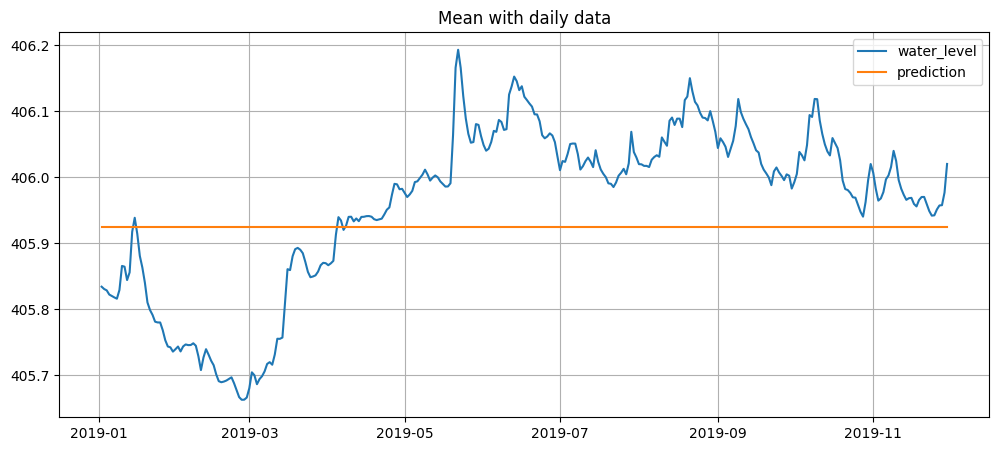

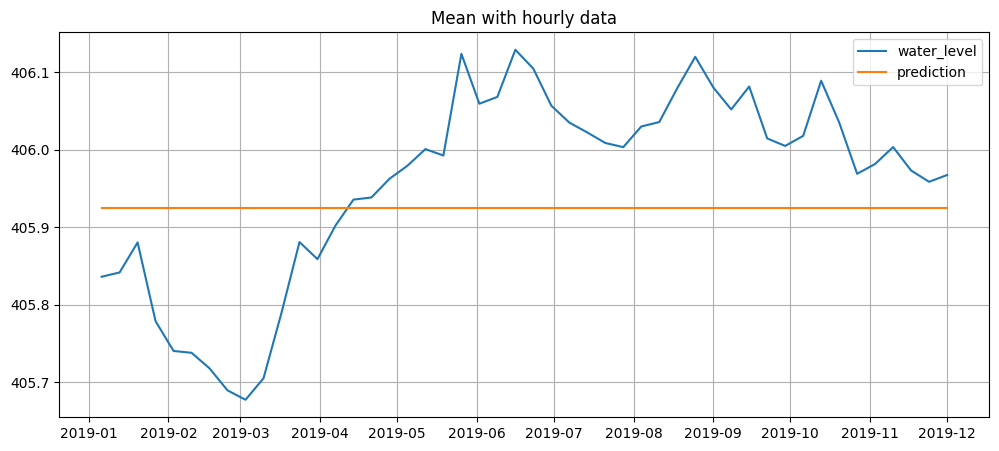

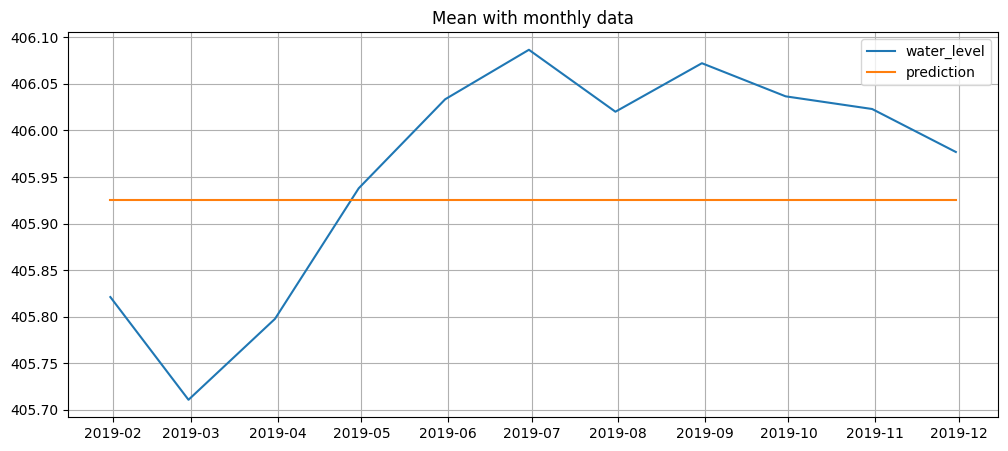

In [163]:
plot_pred(df_list_mean_test[0], 'water_level', 'prediction', 'Mean with daily data')
plot_pred(df_list_mean_test[1], 'water_level', 'prediction', 'Mean with hourly data')
plot_pred(df_list_mean_test[2], 'water_level', 'prediction', 'Mean with monthly data')

**Evaluation**

In [178]:
DWM = ['Daily data', 'Weekly data', 'Monthly data']

for i in range(len(df_list_mean_test)):
    print(f'{DWM[i]}:')
    mean_errors_print(df_list_mean_test[i]['water_level'], df_list_mean_test[i]['prediction'])
    

Daily data:
MAE: 0.11279214164788207 
MSE: 0.016914109240251666 
MAPE: 0.027785016650430358 
R2: -0.06879703783874214
Weekly data:
MAE: 0.11206002522722731 
MSE: 0.016420264783341198 
MAPE: 0.0276047353365216 
R2: -0.06824407224383511
Monthly data:
MAE: 0.11207405067765629 
MSE: 0.015141056520673707 
MAPE: 0.02760841117608187 
R2: -0.06813571555554332


Negligible difference between the different frequencies for this model

# Naive method